In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# import data from tournament

In [2]:
dfs = []
fnames = ['Week1.csv',
         'Week2.csv',
         'Week3.csv',
         'Week4.csv',
         'Week5.csv',
         'Week6.csv',
         'Week7.csv',
         'Week8.csv',
         'Week9.csv',
         'Week10.csv',
         'Week11.csv']

In [3]:
# split treatment and control based on 'Collector ID' associated with different 1st week invite links
for i in range(11):
    dfs.append(pd.read_csv(fnames[i]).iloc[:,1:])
group1 = []
group2 = []
group3 = []
group1.append(dfs[0][dfs[0]['Collector ID'] == 246459632.0])
group2.append(dfs[0][dfs[0]['Collector ID'] == 246459794.0])
group3.append(dfs[0][dfs[0]['Collector ID'] == 246459113.0])

In [4]:
# use emails from first week as key for matching participants results in later weeks
emails1 = group1[0]['Email Address']
emails2 = group2[0]['Email Address']
emails3 = group3[0]['Email Address']
for i in range(1,11):
    group1.append(dfs[i][dfs[i]['Email Address'].isin(emails1)])
    group2.append(dfs[i][dfs[i]['Email Address'].isin(emails2)])
    group3.append(dfs[i][dfs[i]['Email Address'].isin(emails3)])

In [5]:
for i in range(len(dfs)):
    dfs[i] = dfs[i].iloc[:,1:]

In [6]:
# participants who missed one or two weeks but were still rewarded upon completion
missing1 = ['x25@x.edu']
missing2 = ['x55@x.edu','x56@x.edu','x59@x.edu','x69@x.edu','x75@x.edu','x86@x.edu','x88@x.edu']
missing3 = ['x105@x.edu','x131@x.edu','x133@x.edu']

# Computing Scores

In [7]:
# add participants who missed either one or two weeks back to the analysis
group1tot = group1[0]
group2tot = group2[0]
group3tot = group3[0]

for i in range(1,11):

    for j in range(len(missing1)):
        emails = list(group1[i]['Email Address'])
        for k, email in enumerate(emails):
            emails[k] = email.strip()
        if missing1[j].strip() not in emails:
            #print (missing1[j])
            group1[i].loc[group1[i].index[-1]+1] = missing1[j]
            group1[i].iloc[-1,3] = '9/25/19 0:23'
    
    
    for j in range(len(missing2)):
        emails = list(group2[i]['Email Address'])
        for k, email in enumerate(emails):
            emails[k] = email.strip()
        if missing2[j].strip() not in emails:
            #print (missing2[j])
            group2[i].loc[group2[i].index[-1]+1] = missing2[j]
            group2[i].iloc[-1,3] = '9/25/19 0:23'
            
            
    for j in range(len(missing3)):
        emails = list(group3[i]['Email Address'])
        for k, email in enumerate(emails):
            emails[k] = email.strip()
        if missing3[j].strip() not in emails:
            #print (missing3[j])
            group3[i].loc[group3[i].index[-1]+1] = missing3[j]    
            group3[i].iloc[-1,3] = '9/25/19 0:23'
            
    
    group1tot = group1tot.merge(group1[i],on='Email Address')
    group2tot = group2tot.merge(group2[i],on='Email Address')
    group3tot = group3tot.merge(group3[i],on='Email Address')

## Group 1

In [8]:
# removing redundant data
group1tot = group1tot.iloc[:,3:]
group1tot = pd.concat([group1tot.iloc[:,0], group1tot.iloc[:,2:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:2], group1tot.iloc[:,5:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:17], group1tot.iloc[:,19:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:19], group1tot.iloc[:,23:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:31], group1tot.iloc[:,33:35], group1tot.iloc[:,39:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:42], group1tot.iloc[:,44:46], group1tot.iloc[:,50:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:62], group1tot.iloc[:,64:66], group1tot.iloc[:,70:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:85], group1tot.iloc[:,87:89], group1tot.iloc[:,93:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:102], group1tot.iloc[:,104:106], group1tot.iloc[:,110:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:116], group1tot.iloc[:,118:120], group1tot.iloc[:,124:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:130], group1tot.iloc[:,132:134], group1tot.iloc[:,138:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:150], group1tot.iloc[:,152:154], group1tot.iloc[:,158:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:161], group1tot.iloc[:,163:165], group1tot.iloc[:,169:]], axis=1)
group1tot.shape

(41, 178)

## Group 2

In [9]:
# removing redundant data
group2tot = group2tot.iloc[:,3:]
group2tot = pd.concat([group2tot.iloc[:,0], group2tot.iloc[:,2:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:2], group2tot.iloc[:,5:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:17], group2tot.iloc[:,19:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:19], group2tot.iloc[:,23:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:31], group2tot.iloc[:,33:35], group2tot.iloc[:,39:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:42], group2tot.iloc[:,44:46], group2tot.iloc[:,50:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:62], group2tot.iloc[:,64:66], group2tot.iloc[:,70:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:85], group2tot.iloc[:,87:89], group2tot.iloc[:,93:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:102], group2tot.iloc[:,104:106], group2tot.iloc[:,110:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:116], group2tot.iloc[:,118:120], group2tot.iloc[:,124:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:130], group2tot.iloc[:,132:134], group2tot.iloc[:,138:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:150], group2tot.iloc[:,152:154], group2tot.iloc[:,158:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:161], group2tot.iloc[:,163:165], group2tot.iloc[:,169:]], axis=1)
group2tot.shape

(46, 178)

## Group 3

In [10]:
group3tot = group3tot.iloc[:,3:]
group3tot = pd.concat([group3tot.iloc[:,0], group3tot.iloc[:,2:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:2], group3tot.iloc[:,5:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:17], group3tot.iloc[:,19:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:19], group3tot.iloc[:,23:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:31], group3tot.iloc[:,33:35], group3tot.iloc[:,39:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:42], group3tot.iloc[:,44:46], group3tot.iloc[:,50:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:62], group3tot.iloc[:,64:66], group3tot.iloc[:,70:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:85], group3tot.iloc[:,87:89], group3tot.iloc[:,93:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:102], group3tot.iloc[:,104:106], group3tot.iloc[:,110:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:116], group3tot.iloc[:,118:120], group3tot.iloc[:,124:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:130], group3tot.iloc[:,132:134], group3tot.iloc[:,138:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:150], group3tot.iloc[:,152:154], group3tot.iloc[:,158:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:161], group3tot.iloc[:,163:165], group3tot.iloc[:,169:]], axis=1)
group3tot.shape

(42, 178)

### Encoding the results of the games

In [11]:
outcomes = []
nogames = [5,4,3,6,7,5,4,4,6,3,5]
ignore = [2,2,0,None,1,1,2,None,0,None,3]
# Vandy vs LSU, Florida vs TN, A&M vs AU, Miss St vs KY, Mizzou vs SC
week1 = [False,True,False,True,True] #17
outcomes.append(week1)
# Arkansas vs A&M, Bama vs Miss, AU vs Miss St, SC vs KY
week2 = [False,True,True,True] #14
outcomes.append(week2)
# Florida vs AU, TN vs UGA, Miss vs Vandy
week3 = [True,False,True] #11
outcomes.append(week3)
# UGA vs SC, TN vs Miss St, A&M vs Bama, KY vs Arkansas, Mizzou vs Miss, LSU vs Florida 
week4 = [False,True,False,True,True,True] #20
outcomes.append(week4)
# SC vs Florida, Arkansas vs AU, Miss St vs LSU, Vandy vs Mizzou, UGA vs KY, Miss vs A&M, Bama vs TN
week5 = [False,False,False,True,True,False,True] #23
outcomes.append(week5)
# A&M vs Miss St, LSU vs AU, TN vs SC, Bama vs Arkansas, KY vs Mizzou
week6 = [True,True,True,True,True] #17
outcomes.append(week6)
# Florida vs UGA, Arkansas vs Miss St, AU vs Miss, SC vs Vandy 
week7 = [False,False,True,True] #14
outcomes.append(week7)
# Florida vs Vandy, Bama vs LSU, UGA vs Mizzou, KY vs TN
week8 = [True,False,True,False] #14
outcomes.append(week8)
# AU vs UGA, Miss St vs Bama, Mizzou vs FL, Vandy vs KY, Miss vs LSU, A&M vs SC
week9 = [False,False,False,False,False,True] #20
outcomes.append(week9)
# LSU vs Arkansas, UGA vs A&M, Mizzou vs TN
week10 = [True,True,False] #11
outcomes.append(week10)
# Miss St vs Miss, Arkansas vs Mizzou, LSU vs A&M, AU vs Bama, TN vs Vandy
week11 = [True,False,True,True,True] #17
outcomes.append(week11)

### Encoding the weekly indices

In [12]:
indicies = [18,32,43,63,86,103,117,131,151,162]

### Check dates & times to make sure surveys weren't completed after games started

In [13]:
check = datetime.datetime(2019,9,28,12,0,0)
g1ok = group1tot[pd.to_datetime(group1tot.iloc[:,0]) < check]
g2ok = group2tot[pd.to_datetime(group2tot.iloc[:,0]) < check]
g3ok = group3tot[pd.to_datetime(group3tot.iloc[:,0]) < check]

In [14]:
check = datetime.datetime(2019,9,28,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,18]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,18]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,18]) < check]

In [15]:
check = datetime.datetime(2019,10,5,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,32]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,32]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,32]) < check]

In [16]:
check = datetime.datetime(2019,10,12,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,43]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,43]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,43]) < check]

In [17]:
check = datetime.datetime(2019,10,19,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,63]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,63]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,63]) < check]

In [18]:
check = datetime.datetime(2019,10,26,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,86]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,86]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,86]) < check]

In [19]:
check = datetime.datetime(2019,11,2,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,103]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,103]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,103]) < check]

In [20]:
check = datetime.datetime(2019,11,9,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,117]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,117]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,117]) < check]

In [21]:
check = datetime.datetime(2019,11,16,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,131]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,131]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,131]) < check]

In [22]:
check = datetime.datetime(2019,11,23,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,151]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,151]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,151]) < check]

In [23]:
check = datetime.datetime(2019,11,30,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,162]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,162]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,162]) < check]

In [24]:
g1ok.shape

(38, 178)

In [25]:
g2ok.shape

(45, 178)

In [26]:
g3ok.shape

(40, 178)

## Evaluation

In [27]:
IGNORE = False
ISOLATE = False
weeks = 11
NOGAMES = 52

### Compute Tournament Scores 

In [28]:
#no1 - process tournament data for 120-question group

In [29]:
tscores = None
scores1 = 'x'
scorest1 = None
probs = None
probsl = None
predictions1 = None
predictions1t = None
predictions1p = None

In [30]:
ct = 0
count = 2
scores1 = np.zeros(38)
emails = g1ok['Email Address']
predictions1 = np.zeros([g1ok.shape[0],NOGAMES,2]) #***
predictions1t = np.zeros([g1ok.shape[0],NOGAMES])
predictions1p = np.zeros([g1ok.shape[0],NOGAMES])
idx = 0
for it, outcome in enumerate(outcomes[:weeks]):
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        if game == True:
            if type(g1ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g1ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(0)
            elif type(g1ok.iloc[0,count]) == int or type(g1ok.iloc[0,count]) == float:
                tscores = g1ok.iloc[:,count]*1
                tscores = tscores.fillna(0)
            probs = g1ok.iloc[:,count+2]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98] = 98.
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                emailz.append(emails.iloc[i])
                prob=prob[0]
                if tscoresl[i] == 1 or tscoresl[i] == True:
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions1[i,idx,0] = 1
                    predictions1[i,idx,1] = x
                    predictions1t[i,idx] = 1
                    predictions1p[i,idx] = x
                elif tscoresl[i] == 0 or tscoresl[i] == False: 
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions1[i,idx,0] = 0
                    predictions1[i,idx,1] = x
                    predictions1t[i,idx] = 0
                    predictions1p[i,idx] = xx                        
                else:
                    x = 0.5
                    xx = 0.5
                    predictions1[i,idx,0] = 1
                    predictions1[i,idx,1] = -.5
                bscores[i] = (1-x)*(1-x)
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores1 = pd.concat([scores1,tbscores],axis=1)
            except TypeError:
                temails = pd.DataFrame(emailz)
                tbscores = pd.DataFrame(bscores)
                scores1 = pd.concat([temails,tbscores],axis=1)
                scorest1 = tscores
            count += 3
            idx+=1
        if game == False:
            count += 1
            if type(g1ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g1ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(1)
            elif type(g1ok.iloc[0,count]) == int or type(g1ok.iloc[0,count]) == float:
                tscores = g1ok.iloc[:,count]*1
                tscores = tscores.fillna(1)
            probs = g1ok.iloc[:,count+1]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98.] = 98.
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                prob = prob[0]
                emailz.append(emails.iloc[i])
                if tscoresl[i] == 0 or tscoresl[i] == False: #******
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions1[i,idx,0] = 1
                    predictions1[i,idx,1] = 1-x
                    predictions1t[i,idx] = 1
                    predictions1p[i,idx] = x                       
                elif tscoresl[i] == 1 or tscoresl[i] == True: #******
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions1[i,idx,0] = 0
                    predictions1[i,idx,1] = 1-x
                    predictions1t[i,idx] = 0
                    predictions1p[i,idx] = 1-x                        
                else:
                    x = 0.5
                    xx = 0.5
                    predictions1[i,idx,0] = 0
                    predictions1[i,idx,1] = -.5
                bscores[i] = (1-x)*(1-x)
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores1 = pd.concat([scores1,tbscores],axis=1)
            except TypeError:
                temails = pd.DataFrame(emailz)
                tbscores = pd.DataFrame(bscores)
                scores1 = pd.concat([temails,tbscores],axis=1)
            count += 2
            idx+=1
        ct += 1
    count += 2

In [31]:
#no2 - process tournament data for 60-question group

In [32]:
tscores = None
scores2 = 'x'
probs = None
probsl = None
tscoresl = None
emails2 = 'x'
predictions2 = None
predictions2t = None
predictions2p = None

In [33]:
ct = 0
count = 2
emails = g2ok['Email Address']
predictions2 = np.zeros([g2ok.shape[0],NOGAMES,2]) #***
predictions2t = np.zeros([g2ok.shape[0],NOGAMES])
predictions2p = np.zeros([g2ok.shape[0],NOGAMES])
idx = 0
for it, outcome in enumerate(outcomes[:weeks]):
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        if game == True:
            if type(g2ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g2ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(0)
            elif type(g2ok.iloc[0,count]) == int or type(g2ok.iloc[0,count]) == float:
                tscores = g2ok.iloc[:,count]*1
                tscores = tscores.fillna(0)
            probs = g2ok.iloc[:,count+2]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98] = 98.
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            xt = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                prob=prob[0]
                emailz.append(emails.iloc[i])
                xt[i] = x
                if tscoresl[i] == 1 or tscoresl[i] == True:
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions2[i,idx,0] = 1
                    predictions2[i,idx,1] = x
                    predictions2t[i,idx] = 1
                    predictions2p[i,idx] = x
                elif tscoresl[i] == 0 or tscoresl[i] == False: 
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions2[i,idx,0] = 0
                    predictions2[i,idx,1] = x
                    predictions2t[i,idx] = 0
                    predictions2p[i,idx] = xx                        
                else:
                    x = 0.5
                    xx = 0.5
                    predictions2[i,idx,0] = 1
                    predictions2[i,idx,1] = -0.5
                bscores[i] = (1-x)*(1-x)
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores2 = pd.concat([scores2,tbscores],axis=1)
            except:
                temails = pd.DataFrame(emailz)
                tbscores = pd.DataFrame(bscores)
                scores2 = pd.concat([temails,tbscores],axis=1)
            count += 3
            idx+=1
        if game == False:
            count += 1
            if type(g2ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g2ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(1)
            elif type(g2ok.iloc[0,count]) == int or type(g2ok.iloc[0,count]) == float:
                tscores = g2ok.iloc[:,count]*1
                tscores = tscores.fillna(1)
            probs = g2ok.iloc[:,count+1]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98.] = 98.
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            xt = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                prob = prob[0]
                emailz.append(emails.iloc[i])
                if tscoresl[i] == 0 or tscoresl[i] == False:
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions2[i,idx,0] = 1
                    predictions2[i,idx,1] = 1-x
                    predictions2t[i,idx] = 1
                    predictions2p[i,idx] = x                        
                elif tscoresl[i] == 1 or tscoresl[i] == True: 
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions2[i,idx,0] = 0
                    predictions2[i,idx,1] = 1-x
                    predictions2t[i,idx] = 0
                    predictions2p[i,idx] = 1-x                        
                else:
                    x = 0.5
                    xx = 0.5
                    predictions2[i,idx,0] = 0
                    predictions2[i,idx,1] = -0.5
                bscores[i] = (1-x)*(1-x)
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores2 = pd.concat([scores2,tbscores],axis=1)
            except:
                temails = pd.DataFrame(emailz)
                tbscores = pd.DataFrame(bscores)
                scores2 = pd.concat([temails,tbscores],axis=1)
            count += 2
            idx+=1
        ct += 1
    count += 2

In [34]:
#no3 - process tournament data for control group

In [35]:
tscores = None
scores3 = 'x'
probs = None
probsl = None
tscoresl = None
predictions3 = None
predictions3t = None
predictions3p = None

In [36]:
ct = 0
count = 2
emails = g3ok['Email Address']
predictions3 = np.zeros([g3ok.shape[0],NOGAMES,2]) #***
predictions3t = np.zeros([g3ok.shape[0],NOGAMES])
predictions3p = np.zeros([g3ok.shape[0],NOGAMES])
idx = 0
for it, outcome in enumerate(outcomes[:weeks]):
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        if game == True:
            if type(g3ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g3ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(0)
            elif type(g3ok.iloc[0,count]) == int or type(g3ok.iloc[0,count]) == float:
                tscores = g3ok.iloc[:,count]*1
                tscores = tscores.fillna(0)
            probs = g3ok.iloc[:,count+2]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98] = 98
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                prob=prob[0]
                emailz.append(emails.iloc[i])
                if tscoresl[i] == 1 or tscoresl[i] == True:
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions3[i,idx,0] = 1
                    predictions3[i,idx,1] = x
                    predictions3t[i,idx] = 1
                    predictions3p[i,idx] = x
                elif tscoresl[i] == 0 or tscoresl[i] == False: 
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions3[i,idx,0] = 0
                    predictions3[i,idx,1] = x
                    predictions3t[i,idx] = 0
                    predictions3p[i,idx] = xx
                else:
                    x = 0.5
                    xx = 0.5
                    predictions3[i,idx,0] = 1
                    predictions3[i,idx,1] = -0.5
                bscores[i] = (1-x)*(1-x)                
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores3 = pd.concat([scores3,tbscores],axis=1)
            except:
                tbscores = pd.DataFrame(bscores)
                temails = pd.DataFrame(emailz)
                scores3 = pd.concat([temails,tbscores],axis=1)
            count += 3
            idx+=1
        if game == False:
            count += 1
            if type(g3ok.iloc[0,count]) == bool:
                tscores = pd.to_numeric(g3ok.iloc[:,count],errors='coerce')
                tscores = tscores.fillna(1)
            elif type(g3ok.iloc[0,count]) == int or type(g3ok.iloc[0,count]) == float:
                tscores = g3ok.iloc[:,count]*1
                tscores = tscores.fillna(1)
            probs = g3ok.iloc[:,count+1]
            probs = pd.DataFrame([50 if '@' in ele else int(ele) for ele in probs])
            probs[probs.iloc[:] > 98.] = 98.
            probsl = probs.values.tolist()
            tscoresl = np.array(tscores)
            bscores = np.zeros(len(probsl))
            emailz = []
            for i, prob in enumerate(probsl):
                prob=prob[0]
                emailz.append(emails.iloc[i])
                if tscoresl[i] == 0 or tscoresl[i] == False:
                    x = (prob/100.)/2. + 0.5
                    xx = x
                    predictions3[i,idx,0] = 1
                    predictions3[i,idx,1] = 1-x
                    predictions3t[i,idx] = 1
                    predictions3p[i,idx] = x
                elif tscoresl[i] == 1 or tscoresl[i] == True: 
                    x = 1-((prob/100.)/2. + 0.5)
                    xx = 1-x
                    predictions3[i,idx,0] = 0
                    predictions3[i,idx,1] = 1-x
                    predictions3t[i,idx] = 0
                    predictions3p[i,idx] = xx
                else:
                    x = 0.5
                    xx = 0.5
                    predictions3[i,idx,0] = 0
                    predictions3[i,idx,1] = -0.5
                bscores[i] = (1-x)*(1-x)
                probs.iloc[i] = x
            try: 
                tbscores = pd.DataFrame(bscores)
                scores3 = pd.concat([scores3,tbscores],axis=1)
            except:
                temails = pd.DataFrame(emailz)
                tbscores = pd.DataFrame(bscores)
                scores3 = pd.concat([temails,tbscores],axis=1)
            count += 2
            idx+=1
        ct += 1
    count += 2

## Overconfidence & Calibration 

In [37]:
from sklearn.calibration import calibration_curve

In [38]:
# compute overconfidence
def compute_overconf(cal,pred):
    oacount = 0
    toconf = np.zeros(pred.shape[0])
    tocount = np.zeros(pred.shape[0])
    toacount = np.zeros(pred.shape[0])
    overconf = np.zeros(pred.shape[0])
    acc = np.zeros(pred.shape[0])
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            for k in range(11): 
                lthresh = (k*2-1)*0.05
                uthresh = (k*2+1)*0.05
                if pred[i,j,1]-.00001 >= lthresh and pred[i,j,1]-.00001 < uthresh:
                    if pred[i,j,1] <= 0.5 and pred[i,j,0] == 0:# and pred[i,j,2] == 0:
                        cal[i,k*2] += 1
                        toconf[i] += 1-pred[i,j,1]
                    elif pred[i,j,1] >= 0.5 and pred[i,j,0] == 1:# and pred[i,j,2] == 1:
                        cal[i,k*2] += 1.
                        tocount[i] += 1
                        toconf[i] += pred[i,j,1]
                    elif pred[i,j,1] < 0.5 and pred[i,j,0] == 1:
                        cal[i,k*2] += 0
                        tocount[i] += 1
                        toconf[i] += (1-pred[i,j,1])
                    elif pred[i,j,1] > 0.5 and pred[i,j,0] == 0:
                        cal[i,k*2] += 0
                        toconf[i] += pred[i,j,1]
                    cal[i,k*2+1] += 1.
                    oacount += 1
                    toacount[i] += 1
    for i in range(pred.shape[0]):
        overconf[i] = toconf[i]/toacount[i]-tocount[i]/toacount[i]
    return overconf, cal

In [39]:
overconf1 = np.zeros([predictions1.shape[0],22])
oconf1, cal1 = compute_overconf(overconf1, predictions1)

In [40]:
overconf2 = np.zeros([predictions2.shape[0],22])
oconf2, cal2 = compute_overconf(overconf2, predictions2)

In [41]:
overconf3 = np.zeros([predictions3.shape[0],22])
oconf3, cal3 = compute_overconf(overconf3, predictions3)

In [42]:
cdat1 = []
for i in range(scores1.shape[0]):
    cdat1.append({0:[],10:[],20:[],30:[],40:[],50:[],60:[],70:[],80:[],90:[],100:[]})

In [43]:
cdat2 = []
for i in range(scores2.shape[0]):
    cdat2.append({0:[],10:[],20:[],30:[],40:[],50:[],60:[],70:[],80:[],90:[],100:[]})

In [44]:
cdat3 = []
for i in range(scores3.shape[0]):
    cdat3.append({0:[],10:[],20:[],30:[],40:[],50:[],60:[],70:[],80:[],90:[],100:[]})

In [45]:
for i in range(scores1.shape[0]):
    for j in range(11):
        for k in range(int(cal1[i,j*2])):
            cdat1[i][int(j*10)].append(1)
        for k in range(int(cal1[i,j*2+1]-cal1[i,j*2])):
            cdat1[i][int(j*10)].append(0)

In [46]:
for i in range(scores2.shape[0]):
    for j in range(11):
        for k in range(int(cal2[i,j*2])):
            cdat2[i][int(j*10)].append(1)
        for k in range(int(cal2[i,j*2+1]-cal2[i,j*2])):
            cdat2[i][int(j*10)].append(0)

In [47]:
for i in range(cal3.shape[0]):
    for j in range(11):
        for k in range(int(cal3[i,j*2])):
            cdat3[i][int(j*10)].append(1)
        for k in range(int(cal3[i,j*2+1]-cal3[i,j*2])):
            cdat3[i][int(j*10)].append(0)

In [48]:
# compute calibration & decomposition
def calibration(cdat):
    verif = cdat
    if NOGAMES == 8:
        obar = 6/NOGAMES
    elif NOGAMES == 44:
        obar = 25/NOGAMES
    else:
        obar = 31/NOGAMES
    nt = NOGAMES
    bs = 0. 
    bsref = 0. 
    nsum = 0 
    reli = 0. 
    reso = 0. 
    freqs = [] 
    nobs = [] 
    #colors = [] 
    pops = [] 
    for k in sorted(verif.keys()):
        pop = k/100. 
        q = verif[k] 
        nobk = len(q) 
        neventk = sum(q) 
        if nobk == 0: continue 
        pops.append(pop) 
        freq = float(neventk) / nobk 
        freqs.append(freq) 
        nobs.append(nobk) 
        reli += nobk*(pop-freq)**2  
        reso += nobk*(freq-obar)**2 
        for event in q:
            bs += (pop-event)**2
            bsref += (obar-event)**2 
            nsum += 1
    bs = bs/nsum 
    bsref = bsref/nsum
    bss = 1. - bs/bsref
    unc = obar*(1-obar) 
    reli = reli/nsum
    reso = reso/nsum 
    bs2 = reli - reso + unc 
    return unc, reli, reso, bs

In [49]:
dcmp1l,dcmp2l,dcmp3l,dcmp4l = [],[],[],[]
for i in range(scores1.shape[0]):
    unc, reli, reso, bs = calibration(cdat1[i])
    dcmp1l.append(unc)
    dcmp2l.append(reli)
    dcmp3l.append(reso)
    dcmp4l.append(bs)
dcmp1alt = pd.concat([pd.Series(dcmp1l),pd.Series(dcmp2l),pd.Series(dcmp3l),pd.Series(dcmp4l)],axis=1)

In [50]:
dcmp1l,dcmp2l,dcmp3l,dcmp4l = [],[],[],[]
for i in range(scores2.shape[0]):
    unc, reli, reso, bs = calibration(cdat2[i])
    dcmp1l.append(unc)
    dcmp2l.append(reli)
    dcmp3l.append(reso)
    dcmp4l.append(bs)
dcmp2alt = pd.concat([pd.Series(dcmp1l),pd.Series(dcmp2l),pd.Series(dcmp3l),pd.Series(dcmp4l)],axis=1)

In [51]:
dcmp1l,dcmp2l,dcmp3l,dcmp4l = [],[],[],[]
for i in range(cal3.shape[0]):
    unc, reli, reso, bs = calibration(cdat3[i])
    dcmp1l.append(unc)
    dcmp2l.append(reli)
    dcmp3l.append(reso)
    dcmp4l.append(bs)
dcmp3alt = pd.concat([pd.Series(dcmp1l),pd.Series(dcmp2l),pd.Series(dcmp3l),pd.Series(dcmp4l)],axis=1)

In [52]:
dcmp1alt = pd.concat([scores1.iloc[:,0:1],dcmp1alt,pd.Series(oconf1)],axis=1)
dcmp2alt = pd.concat([scores2.iloc[:,0:1],dcmp2alt,pd.Series(oconf2)],axis=1)
dcmp3alt = pd.concat([scores3.iloc[:,0:1],dcmp3alt,pd.Series(oconf3)],axis=1)

## Calibration Curve

In [53]:
NBINS, STRATEGY = 20, 'uniform'

In [54]:
atot3, btot3 = [],[]
for i in range(predictions3t.shape[0]):
    for j in range(predictions3t.shape[1]):
        atot3.append(predictions3t[i,j])
        btot3.append(predictions3p[i,j])

In [55]:
a3,b3 = calibration_curve(atot3, btot3, n_bins=NBINS-1,normalize=True,strategy=STRATEGY)
a3,b3=a3[1:],b3[1:]
x = [.5,.6,.7,.8,.9,1.]
x3tmp = [j - i for i, j in zip(b3[: -1], b3[1 :])]
x3tmp = [(b3[-1]-b3[0])*.02/x for x in x3tmp]

In [56]:
atot2, btot2 = [],[]
for i in range(predictions2t.shape[0]):
    for j in range(predictions2t.shape[1]):
        atot2.append(predictions2t[i,j])
        btot2.append(predictions2p[i,j])

In [57]:
a2,b2 = calibration_curve(atot2, btot2, n_bins=NBINS,normalize=True,strategy=STRATEGY)
a2, b2 = a2[1:],b2[1:]
x = [.5,.6,.7,.8,.9,1.]
x2tmp = [j - i for i, j in zip(b2[: -1], b2[1 :])]
x2tmp = [(b2[-1]-b2[0])*.05/x for x in x2tmp]

In [58]:
atot1, btot1 = [],[]
for i in range(predictions1t.shape[0]):
    for j in range(predictions1t.shape[1]):
        atot1.append(predictions1t[i,j])
        btot1.append(predictions1p[i,j])

In [59]:
a1,b1 = calibration_curve(atot1, btot1, n_bins=NBINS,normalize=True,strategy=STRATEGY)
a1,b1=a1[1:],b1[1:]
x = [.5,.6,.7,.8,.9,1.]
x1tmp = [j - i for i, j in zip(b1[: -1], b1[1 :])]
x1tmp = [(b1[-1]-b1[0])*.035/x for x in x1tmp]

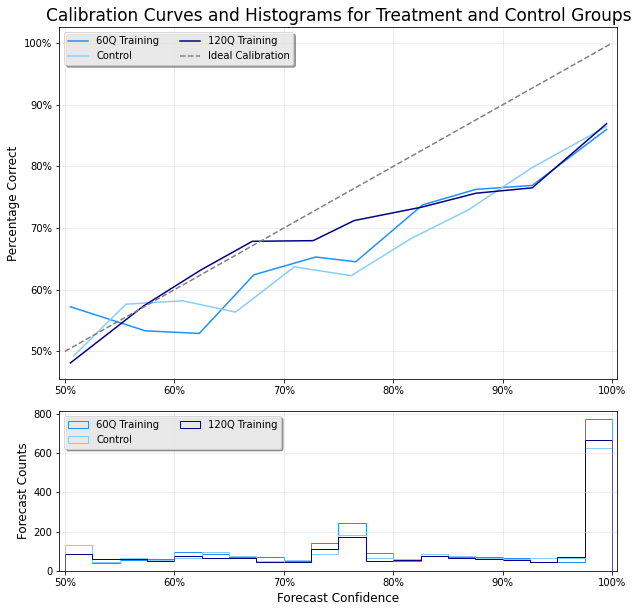

In [60]:
fig = plt.figure(2, figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.set_title('Calibration Curves and Histograms for Treatment and Control Groups', fontsize=17)
b3[-2] = b1[-2]
b2[-2] = b1[-2]
b1[0], b2[0] = 0.505, 0.505
b1[-1],b2[-1],b3[-1] = .995,.995,.995
ax1.plot(b2,a2,color='dodgerblue', label="60Q Training")#,marker='.')
ax1.plot(b3,a3,color='lightskyblue', label="Control")#,marker='.')
ax1.plot(b1,a1,color='darkblue', label='120Q Training')#,marker='.')
x = [.5,.6,.7,.8,.9,1.]
ax1.plot(x,x,color='grey',linestyle='--',label='Ideal Calibration')
ax1.grid(color='lightgrey',alpha=0.5)
leg = ax1.legend(loc='best', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.75)
ax1.xaxis.set_major_formatter(PercentFormatter(1))
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.set_ylabel("Percentage Correct",fontsize=12)
ax1.set_xlim(0.495,1.005)
ax2.hist(btot2,bins=NBINS,color='dodgerblue', label="60Q Training",histtype='step',range=(0.5,1.0))
ax2.hist(btot3,bins=NBINS,color='lightskyblue', label="Control",histtype='step',range=(0.5,1.0))
ax2.hist(btot1,bins=NBINS,color='darkblue', label='120Q Training',histtype='step',range=(0.5,1.0))
ax2.grid(color='lightgrey',alpha=0.5)
ax2.set_xlim(0.495,1.005)
leg = plt.legend(loc='upper left', ncol=2, shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.75)
ax2.xaxis.set_major_formatter(PercentFormatter(1))
ax2.set_xlabel("Forecast Confidence",fontsize=12)
ax2.set_ylabel("Forecast Counts",fontsize=12)
plt.savefig('calibration-curve-all-games.png',dpi=300)

# preparing data for export

### open training data and combine with tournament data
### 1) control group:


In [61]:
import copy
NUM = NOGAMES

In [62]:
# load training data
t0 = pd.read_csv("ControlGroup.csv")
t0 = t0.iloc[:,1:]
Q1 = list(t0.iloc[:,-19])
# process responses to cognitive reflection test (CRT)
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        Q1[i] = 1
    else:
        Q1[i] = 0
Q2 = list(t0.iloc[:,-17])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]) and '50' not in str(Q2[i]):
        Q2[i] = 1
    else:
        Q2[i] = 0
Q3 = list(t0.iloc[:,-16])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        Q3[i] = 1
    else:
        Q3[i] = 0
Q4 = list(t0.iloc[:,-6])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): #
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        Q4[i] = 4
Q5 = list(t0.iloc[:,-11])
Q6 = list(t0.iloc[:,-4])
for i in range(len(Q5)):
    if len(str(Q5[i])) > 0:
        tmpQ = str(Q5[i]).split(',')
        if len(tmpQ) < 2:
            Q5[i] = 0
        elif len(tmpQ) == 2:
            Q5[i] = 1
        elif len(tmpQ) == 3:
            Q5[i] = 2
        elif len(tmpQ) == 4:
            Q5[i] = 3
        elif len(tmpQ) == 5:
            Q5[i] = 4
        else:
            Q5[i] = 5
for i in range(len(Q6)):
    if len(str(Q6[i])) > 0:
        tmpQ = str(Q6[i]).split(',')
        if len(tmpQ) < 2:
            Q6[i] = 0
        elif len(tmpQ) == 2:
            Q6[i] = 1
        elif len(tmpQ) == 3:
            Q6[i] = 2
        elif len(tmpQ) == 4:
            Q6[i] = 3
        elif len(tmpQ) == 5:
            Q6[i] = 4
        else:
            Q6[i] = 5
Q6 = pd.DataFrame(Q6)
Q5 = pd.DataFrame(Q5)
Q4 = pd.DataFrame(Q4)
t0['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [63]:
# merge data
t0['Female'] = t0.index
t0.Female[t0.iloc[:,9] == 'Female'] = 1
t0.Female[t0.iloc[:,9] == 'Male'] = 0
t0.iloc[:,-11][pd.notnull(t0.iloc[:,-11])] = 1
t0.iloc[:,-11][pd.isnull(t0.iloc[:,-11])] = 0
t0 = pd.concat([t0.iloc[:,-4],t0.iloc[:,-1],t0[['Qs']],t0.iloc[:,-5]],axis=1)#,t0.iloc[:,-11]],axis=1)
t0.columns = ['Email Address', 'Female', 'CRT','EXPERTISE']
t0 = t0.dropna()
scores3t = pd.concat([scores3.iloc[:,0],scores3.iloc[:,1:].sum(axis=1)],axis=1)
scores3t.columns = ['Email Address', 'Brier Scores']
scores3t['Brier Scores'] = scores3t['Brier Scores']/NUM
t0c = copy.deepcopy(t0)
dcmp3alt.columns = ['Email Address', 'buncertainty', 'bcalibration', 'bresolution','bs','oconf']
scores3t = dcmp3alt.merge(scores3t,on='Email Address')
scores3t = scores3t.merge(t0c,on='Email Address')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

### 2) 120-question treatment group:

In [64]:
# load training data
t120 = pd.read_csv("TreatmentGroup120Training.csv")
t120 = t120.iloc[:,1:]
Q1 = list(t120.iloc[:,-24])
# process responses to cognitive reflection test (CRT)
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        Q1[i] = 1
    else:
        Q1[i] = 0
Q2 = list(t120.iloc[:,-23])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]):
        Q2[i] = 1
    else:
        Q2[i] = 0
Q3 = list(t120.iloc[:,-22])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        Q3[i] = 1
    else:
        Q3[i] = 0
Q4 = list(t120.iloc[:,-4])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): 
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        Q4[i] = 4
Q5 = list(t120.iloc[:,-9])
for i in range(len(Q5)):
    if len(str(Q5[i])) > 0:
        tmpQ = str(Q5[i]).split(',')
        if len(tmpQ) < 2:
            Q5[i] = 0
        elif len(tmpQ) == 2:
            Q5[i] = 1
        elif len(tmpQ) == 3:
            Q5[i] = 2
        elif len(tmpQ) == 4:
            Q5[i] = 3
        elif len(tmpQ) == 5:
            Q5[i] = 4
        else:
            Q5[i] = 5
Q5 = pd.DataFrame(Q5)
Q4 = pd.DataFrame(Q4)
t120['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [65]:
# merge data
t120['Female'] = t120.index
t120.Female[t120.iloc[:,-15] == 'Female'] = 1
t120.Female[t120.iloc[:,-15] == 'Male'] = 0
t120.iloc[:,-11][pd.notnull(t120.iloc[:,-11])] = 1
t120.iloc[:,-11][pd.isnull(t120.iloc[:,-11])] = 0
t120 = pd.concat([t120.iloc[:,-4],t120.iloc[:,-1],t120[['Qs']],t120.iloc[:,-5]],axis=1)
t120.columns = ['Email Address', 'Female', 'CRT','EXPERTISE']
t120 = t120.dropna()
scores1t = pd.concat([scores1.iloc[:,0],scores1.iloc[:,1:].sum(axis=1)],axis=1) 
scores1t.columns = ['Email Address', 'Brier Scores']
scores1t['Brier Scores'] = scores1t['Brier Scores']/NUM
dcmp1alt.columns = ['Email Address', 'buncertainty', 'bcalibration', 'bresolution','bs','oconf']
scores1t = scores1t.merge(dcmp1alt,on='Email Address')
t120c = copy.deepcopy(t120)
scores1t = scores1t.merge(t120c,on='Email Address')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

### 3) 60-question treatment group

In [66]:
# load training data
t60 = pd.read_csv("TreatmentGroup60Training.csv")
t60 = t60.iloc[:,1:]
Q1 = list(t60.iloc[:,-24])
# process responses to cognitive reflection test (CRT)
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        Q1[i] = 1
    else:
        Q1[i] = 0
Q2 = list(t60.iloc[:,-23])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]):
        Q2[i] = 1
    else:
        Q2[i] = 0
Q3 = list(t60.iloc[:,-22])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        Q3[i] = 1
    else:
        Q3[i] = 0
Q4 = list(t60.iloc[:,-4])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): 
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        Q4[i] = 4
Q5 = list(t60.iloc[:,-9])
for i in range(len(Q5)):
    if len(str(Q5[i])) > 0:
        tmpQ = str(Q5[i]).split(',')
        if len(tmpQ) < 2:
            Q5[i] = 0
        elif len(tmpQ) == 2:
            Q5[i] = 1
        elif len(tmpQ) == 3:
            Q5[i] = 2
        elif len(tmpQ) == 4:
            Q5[i] = 3
        elif len(tmpQ) == 5:
            Q5[i] = 4
        else:
            Q5[i] = 5
Q5 = pd.DataFrame(Q5)
Q4 = pd.DataFrame(Q4)
t60['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [67]:
# merge data
t60['Female'] = t60.index
t60.Female[t60.iloc[:,-15] == 'Female'] = 1
t60.Female[t60.iloc[:,-15] == 'Male'] = 0
t60.iloc[:,-11][pd.notnull(t60.iloc[:,-11])] = 1
t60.iloc[:,-11][pd.isnull(t60.iloc[:,-11])] = 0
t60 = pd.concat([t60.iloc[:,-4],t60.iloc[:,-1],t60[['Qs']],t60.iloc[:,-5]],axis=1)
t60.columns = ['Email Address', 'Female', 'CRT','EXPERTISE']
t60 = t60.dropna()
scores2t = pd.concat([scores2.iloc[:,0],scores2.iloc[:,1:].sum(axis=1)],axis=1)
scores2t.columns = ['Email Address', 'Brier Scores']
scores2t['Brier Scores'] = scores2t['Brier Scores']/NUM
dcmp2alt.columns = ['Email Address', 'buncertainty', 'bcalibration', 'bresolution','bs','oconf']
scores2t = scores2t.merge(dcmp2alt,on='Email Address')
t60c = copy.deepcopy(t60)
scores2t = scores2t.merge(t60c,on='Email Address')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [68]:
print("Total participants processed 120-question group: " + str(scores1t.shape[0]))
print("Total participants processed 60-question group: " + str(scores2t.shape[0]))
print("Total participants processed control group: " + str(scores3t.shape[0]))

Total participants processed 120-question group: 38
Total participants processed 60-question group: 45
Total participants processed control group: 40


In [69]:
# prepare dataframe for export
X = np.zeros((scores1t.shape[0]+scores2t.shape[0]+scores3t.shape[0],9))
X[:scores1t.shape[0],0] = 1
X[:scores1t.shape[0],2] = scores1t['CRT'].to_numpy()
X[:scores1t.shape[0],3] = scores1t['Female'].to_numpy()
X[:scores1t.shape[0],4] = scores1t['EXPERTISE'].to_numpy()
X[:scores1t.shape[0],5] = scores1t['Brier Scores'].to_numpy()
X[:scores1t.shape[0],6] = scores1t['bcalibration'].to_numpy()
X[:scores1t.shape[0],7] = scores1t['bresolution'].to_numpy()
X[:scores1t.shape[0],8] = scores1t['oconf'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],1] = 1
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],2] = scores2t['CRT'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],3] = scores2t['Female'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],4] = scores2t['EXPERTISE'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],5] = scores2t['Brier Scores'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],6] = scores2t['bcalibration'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],7] = scores2t['bresolution'].to_numpy()
X[scores1t.shape[0]:scores1t.shape[0]+scores2t.shape[0],8] = scores2t['oconf'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,2] = scores3t['CRT'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,3] = scores3t['Female'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,4] = scores3t['EXPERTISE'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,5] = scores3t['Brier Scores'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,6] = scores3t['bcalibration'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,7] = scores3t['bresolution'].to_numpy()
X[scores1t.shape[0]+scores2t.shape[0]:,8] = scores3t['oconf'].to_numpy()

In [70]:
# export dataframe
X = pd.DataFrame(X)
X.columns = ['D120','D60','CRT','FEMALE','EXPERTISE','BSCORE','CAL','RES','OCONF']
X.to_csv("data-all-games_anon.csv")